<a href="https://colab.research.google.com/github/michellee-wang/wharton-data-sci/blob/main/wharton_data_sci_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [108]:
df_game = pd.read_csv('/content/games_2022.csv')
print(df_game.shape)
df_game.head()

(10438, 30)


,game_id,game_date,team,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,BLK,STL,TOV,TOV_team,DREB,OREB,F_tech,F_personal,team_score,opponent_team_score,largest_lead,notD1_incomplete,OT_length_min_tot,rest_days,attendance,tz_dif_H_E,prev_game_dist,home_away,home_away_NS,travel_dist
0,game_2022_2011,2021-12-30,georgia_lady_bulldogs,50,22,11,5,6,3,14,7,7,18,0,25,11,0,18,62,68,1.0,False,NaN,9.0,3241.0,0.0,0.0,home,1,0.0
1,game_2022_2011,2021-12-30,lsu_tigers,50,24,11,4,15,8,15,2,15,14,2,25,11,0,7,68,62,14.0,False,NaN,3.0,3241.0,0.0,824.0,away,-1,824.0
2,game_2022_2012,2021-12-30,missouri_tigers,43,18,15,7,16,13,10,1,4,8,1,31,6,0,11,70,69,8.0,False,5.0,8.0,6139.0,0.0,371.0,home,1,0.0
3,game_2022_2012,2021-12-30,south_carolina_gamecocks,55,23,21,6,9,5,15,8,3,8,0,27,20,0,15,69,70,6.0,False,5.0,9.0,6139.0,0.0,1154.0,away,-1,1154.0
4,game_2022_2013,2021-12-30,tennessee_lady_volunteers,41,20,15,4,15,10,16,8,5,15,1,34,12,0,13,62,44,19.0,False,NaN,3.0,8124.0,0.0,0.0,home,1,0.0


In [109]:
df_region = pd.read_csv('/content/Team Region Groups.csv')
df_region.head()

,team,region
0,alabama_crimson_tide,North
1,alabama_state_lady_hornets,North
2,arkansas_razorbacks,North
3,belmont_bruins,North
4,charleston_cougars,North


In [110]:
## Merge region
df = df_game.merge(df_region, on='team', how ='left')
print(df.shape)
df.head()

(10438, 31)


,game_id,game_date,team,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,BLK,STL,TOV,TOV_team,DREB,OREB,F_tech,F_personal,team_score,opponent_team_score,largest_lead,notD1_incomplete,OT_length_min_tot,rest_days,attendance,tz_dif_H_E,prev_game_dist,home_away,home_away_NS,travel_dist,region
0,game_2022_2011,2021-12-30,georgia_lady_bulldogs,50,22,11,5,6,3,14,7,7,18,0,25,11,0,18,62,68,1.0,False,NaN,9.0,3241.0,0.0,0.0,home,1,0.0,North
1,game_2022_2011,2021-12-30,lsu_tigers,50,24,11,4,15,8,15,2,15,14,2,25,11,0,7,68,62,14.0,False,NaN,3.0,3241.0,0.0,824.0,away,-1,824.0,North
2,game_2022_2012,2021-12-30,missouri_tigers,43,18,15,7,16,13,10,1,4,8,1,31,6,0,11,70,69,8.0,False,5.0,8.0,6139.0,0.0,371.0,home,1,0.0,South
3,game_2022_2012,2021-12-30,south_carolina_gamecocks,55,23,21,6,9,5,15,8,3,8,0,27,20,0,15,69,70,6.0,False,5.0,9.0,6139.0,0.0,1154.0,away,-1,1154.0,North
4,game_2022_2013,2021-12-30,tennessee_lady_volunteers,41,20,15,4,15,10,16,8,5,15,1,34,12,0,13,62,44,19.0,False,NaN,3.0,8124.0,0.0,0.0,home,1,0.0,North


In [111]:
df['region'] = df['region'].fillna('NA') #some of the regions dont have regions
df['notD1_incomplete'] = df['notD1_incomplete'].astype(int) #convering to numeric int

In [112]:
### Create new features
df['FG_pct_2'] = df['FGM_2']/df['FGA_2']
df['FG_pct_3'] = df['FGM_3']/df['FGA_3']
df['FT_pct'] = df['FTM']/df['FTA']
df.loc[df.team_score > df.opponent_team_score, 'team_win'] = 1
df.loc[df.team_score <= df.opponent_team_score, 'team_win'] = 0
df['score_diff'] = df['team_score'] - df['opponent_team_score']
df['ORB_pct'] = df['OREB']/(df['OREB'] + df['DREB'])  # Rebounds percentage
df['possession'] = 0.96*((df['FGA_2']+df['FGA_3'])+df['TOV']+0.44*df['FTA']-df['OREB'])# Possession
df['TOV_pct'] = df['TOV']/df['possession']
df['offensive_efficiency'] = df['team_score'] / df['possession'] * 100
df['defensive_efficiency'] = df['opponent_team_score'] / df['possession'] * 100
df['efficiency_margin'] = df['offensive_efficiency'] - df['defensive_efficiency']
## match stats will include FG_pct_2, FG_pct_3, FT_pct, ORB_pct, and TOV_pct

In [113]:
#df['team_win'] = 0
#df.loc[df.score_diff > 0 , 'team_win'] = 1
#accumulative win/score for each team
df = df.sort_values(by=['team', 'game_date'], ascending=True) #sorting data by team & game date
df['team_win_cumsum'] = df.groupby(['region','team'])['team_win'].cumsum()
df['team_win_cumcount'] = df.groupby(['region','team'])['team_win'].cumcount() #
df['team_win_cum_pct'] = df['team_win_cumsum']/df['team_win_cumcount']
df['team_win_cum_pct'] = df['team_win_cum_pct'].fillna(0)

### Data Process

In [114]:
### Numeric Column List
num_cols = df.select_dtypes(include=['number', 'bool']).columns.tolist()
print(num_cols)
print(len(num_cols))
### Categorical Column List
cat_cols = df.select_dtypes(include= 'object').columns.tolist()
print(cat_cols)
print(len(cat_cols))

['FGA_2', 'FGM_2', 'FGA_3', 'FGM_3', 'FTA', 'FTM', 'AST', 'BLK', 'STL', 'TOV', 'TOV_team', 'DREB', 'OREB', 'F_tech', 'F_personal', 'team_score', 'opponent_team_score', 'largest_lead', 'notD1_incomplete', 'OT_length_min_tot', 'rest_days', 'attendance', 'tz_dif_H_E', 'prev_game_dist', 'home_away_NS', 'travel_dist', 'FG_pct_2', 'FG_pct_3', 'FT_pct', 'team_win', 'score_diff', 'ORB_pct', 'possession', 'TOV_pct', 'offensive_efficiency', 'defensive_efficiency', 'efficiency_margin', 'team_win_cumsum', 'team_win_cumcount', 'team_win_cum_pct']
40
['game_id', 'game_date', 'team', 'home_away', 'region']
5


In [115]:
df.describe() #u can see which rows are missing data using the count row

,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,BLK,STL,TOV,TOV_team,DREB,OREB,F_tech,F_personal,team_score,opponent_team_score,largest_lead,notD1_incomplete,OT_length_min_tot,rest_days,attendance,tz_dif_H_E,prev_game_dist,home_away_NS,travel_dist,FG_pct_2,FG_pct_3,FT_pct,team_win,score_diff,ORB_pct,possession,TOV_pct,offensive_efficiency,defensive_efficiency,efficiency_margin,team_win_cumsum,team_win_cumcount,team_win_cum_pct
count,10438.000000,10438.000000,10438.000000,10438.00000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10432.000000,10438.000000,438.000000,9777.000000,8976.000000,9538.000000,9291.000000,10438.000000,9697.000000,10438.000000,10438.000000,10431.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,1.043800e+04
mean,39.713834,17.677524,19.051255,5.86348,16.076260,11.332727,12.967043,3.180686,7.816057,15.934279,0.691129,25.321039,11.512550,0.095804,16.415884,64.278214,64.278214,11.945073,0.029316,5.799087,4.252327,1329.131016,-0.022856,469.626305,0.000000,381.111168,0.446399,0.304828,0.703223,0.500000,0.000000,0.308753,67.449957,0.235596,95.325099,95.330541,-0.005442,7.676375,13.495018,inf
std,8.211865,5.169509,6.593565,3.02670,6.923232,5.344288,4.894779,2.249359,3.614573,5.191521,0.918245,5.595095,4.521354,0.400751,4.481699,13.912895,13.912895,12.256336,0.168699,2.068794,3.242146,1814.551281,0.275720,659.078871,0.928094,650.164238,0.098206,0.116997,0.141474,0.500024,20.404062,0.092793,6.035896,0.070936,18.658607,18.688180,29.651247,5.846679,8.587160,NaN
min,9.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,9.000000,0.000000,0.000000,4.000000,15.000000,15.000000,0.000000,0.000000,5.000000,1.000000,17.000000,-3.000000,0.000000,-1.000000,0.000000,0.050000,0.000000,0.000000,0.000000,-118.000000,0.000000,49.344000,0.029442,17.828617,17.844906,-140.251788,0.000000,0.000000,0.000000e+00
25%,34.000000,14.000000,14.000000,4.00000,11.000000,7.000000,10.000000,2.000000,5.000000,12.000000,0.000000,21.000000,8.000000,0.000000,13.000000,55.000000,55.000000,3.000000,0.000000,5.000000,2.000000,342.000000,0.000000,0.000000,-1.000000,0.000000,0.380952,0.227273,0.615385,0.000000,-12.000000,0.244444,63.206400,0.186270,82.937341,82.958124,-18.163085,3.000000,6.000000,3.809524e-01
50%,39.000000,17.000000,19.000000,6.00000,15.000000,11.000000,13.000000,3.000000,7.000000,15.000000,0.000000,25.000000,11.000000,0.000000,16.000000,64.000000,64.000000,9.000000,0.000000,5.000000,3.000000,650.500000,0.000000,265.000000,0.000000,98.000000,0.444444,0.300000,0.714286,0.500000,0.000000,0.307692,66.931200,0.231013,95.311973,95.292548,-0.009281,7.000000,13.000000,5.833333e-01
75%,45.000000,21.000000,23.000000,8.00000,20.000000,15.000000,16.000000,4.000000,10.000000,19.000000,1.000000,29.000000,14.000000,0.000000,19.000000,73.000000,73.000000,17.000000,0.000000,5.000000,5.000000,1465.000000,0.000000,622.500000,1.000000,508.000000,0.511111,0.380542,0.800000,1.000000,12.000000,0.371429,71.040000,0.279860,107.669352,107.452573,18.282874,11.000000,21.000000,7.894737e-01
max,76.000000,50.000000,66.000000,23.00000,48.000000,40.000000,43.000000,18.000000,32.000000,49.000000,7.000000,53.000000,32.000000,5.000000,35.000000,137.000000,137.000000,118.000000,1.000000,15.000000,39.000000,18000.000000,3.000000,7794.000000,1.000000,6804.000000,0.875000,0.833333,1.000000,1.000000,118.000000,0.657143,99.609600,0.582401,175.014738,178.062678,140.379930,29.000000,33.000000,inf


In [116]:
### Categorical Features
## min and max of game date
df['game_date'].astype('datetime64[ns]').agg({'min', 'max'})

## distinct number of teams and number of games by region
print('team number by region: ', df.groupby('region')['team'].nunique())
print('game number by region: ', df.groupby('region')['game_id'].nunique())

team number by region:  region
NA       425
North     48
South     43
West      48
Name: team, dtype: int64
game number by region:  region
NA       4326
North    1146
South    1034
West     1125
Name: game_id, dtype: int64


### Part 1 Team Rating

### Create Match Table

In [117]:
df_home = df[df.home_away == 'home']
df_away = df[df.home_away == 'away']
df_home.shape, df_away.shape #making sure they are equally split

((5219, 45), (5219, 45))

In [118]:
### Generating match table with Home team stats and Away team stats
#renaming data with home_ and away_
df_home = df_home.set_index(['game_id', 'game_date'])
df_home.columns = ['home_' + col for col in df_home.columns]
df_away = df_away.set_index(['game_id', 'game_date'])
df_away.columns = ['away_' + col for col in df_away.columns]
df_matches = df_home.merge(df_away, left_index=True, right_index=True).reset_index()

In [119]:
df_matches.describe()

,home_FGA_2,home_FGM_2,home_FGA_3,home_FGM_3,home_FTA,home_FTM,home_AST,home_BLK,home_STL,home_TOV,home_TOV_team,home_DREB,home_OREB,home_F_tech,home_F_personal,home_team_score,home_opponent_team_score,home_largest_lead,home_notD1_incomplete,home_OT_length_min_tot,home_rest_days,home_attendance,home_tz_dif_H_E,home_prev_game_dist,home_home_away_NS,home_travel_dist,home_FG_pct_2,home_FG_pct_3,home_FT_pct,home_team_win,home_score_diff,home_ORB_pct,home_possession,home_TOV_pct,home_offensive_efficiency,home_defensive_efficiency,home_efficiency_margin,home_team_win_cumsum,home_team_win_cumcount,home_team_win_cum_pct,away_FGA_2,away_FGM_2,away_FGA_3,away_FGM_3,away_FTA,away_FTM,away_AST,away_BLK,away_STL,away_TOV,away_TOV_team,away_DREB,away_OREB,away_F_tech,away_F_personal,away_team_score,away_opponent_team_score,away_largest_lead,away_notD1_incomplete,away_OT_length_min_tot,away_rest_days,away_attendance,away_tz_dif_H_E,away_prev_game_dist,away_home_away_NS,away_travel_dist,away_FG_pct_2,away_FG_pct_3,away_FT_pct,away_team_win,away_score_diff,away_ORB_pct,away_possession,away_TOV_pct,away_offensive_efficiency,away_defensive_efficiency,away_efficiency_margin,away_team_win_cumsum,away_team_win_cumcount,away_team_win_cum_pct
count,5219.00000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.00000,5216.000000,5219.000000,219.000000,5008.000000,4488.000000,4769.000000,4665.000000,5219.000000,4769.000000,5219.000000,5219.000000,5216.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.00000,5219.000000,5216.000000,5219.000000,219.000000,4769.000000,4488.000000,4769.000000,4626.00000,5219.000000,4928.000000,5219.000000,5219.000000,5215.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000
mean,40.24200,18.543208,19.336463,6.163824,16.804560,11.952290,14.154627,3.491282,8.278214,15.227055,0.616785,26.059015,11.956888,0.086415,15.956313,67.530178,61.02625,15.288919,0.000383,5.799087,4.295128,1329.131016,-0.022856,362.750697,0.861276,96.776263,0.462283,0.315329,0.711771,0.619276,6.503928,0.310475,67.432931,0.225523,100.005734,90.692799,9.312935,8.047327,13.638628,inf,39.185668,16.811841,18.766047,5.563135,15.347959,10.713163,11.779460,2.870090,7.353899,16.641502,0.765472,24.583062,11.068212,0.105193,16.875455,61.02625,67.530178,8.601227,0.058249,5.799087,4.207381,1329.131016,-0.022856,577.40294,-0.861276,656.272119,0.430514,0.294328,0.694673,0.380724,-6.503928,0.307031,67.466983,0.245670,90.644463,99.968282,-9.323819,7.305422,13.351408,inf
std,8.38252,5.330348,6.718754,3.134977,7.058951,5.429522,5.086003,2.353502,3.874419,4.763312,0.847693,5.690090,4.679152,0.363648,4.405083,14.071860,12.96158,14.083763,0.019574,2.071165,3.210223,1814.652378,0.275734,640.833509,0.345691,465.035268,0.096418,0.115805,0.135655,0.485611,19.340540,0.091487,6.046162,0.066469,17.890513,18.210823,28.108958,5.890585,8.426883,NaN,8.003606,4.851913,6.454002,2.883583,6.706834,5.184662,4.385618,2.094817,3.270228,5.497207,0.978196,5.399039,4.312748,0.434531,4.510858,12.96158,14.071860,8.930010,0.234236,2.071165,3.275068,1814.652378,0.275734,659.73991,0.345691,684.550834,0.097415,0.117251,0.146579,0.485611,19.340540,0.094059,6.026144,0.073782,18.233441,17.997318,28.191316,5.779239,8.742949,NaN
min,10.00000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,9.000000,1.000000,0.000000,4.000000,28.000000,15.00000,0.000000,0.000000,5.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,0.147059,0.000000,0.000000,0.000000,-56.000000,0.031250,49.3

In [120]:
## Fill missing value
# 1. match stats fill 0
df_matches[['home_FG_pct_2', 'home_FG_pct_3', 'home_FT_pct', 'home_ORB_pct', 'home_TOV_pct', 'home_AST', 'home_BLK', 'home_STL',
            'away_FG_pct_2', 'away_FG_pct_3', 'away_FT_pct', 'away_ORB_pct', 'away_TOV_pct', 'away_AST', 'away_BLK', 'away_STL']] = \
            df_matches[['home_FG_pct_2', 'home_FG_pct_3', 'home_FT_pct', 'home_ORB_pct', 'home_TOV_pct', 'home_AST', 'home_BLK', 'home_STL',
                        'away_FG_pct_2', 'away_FG_pct_3', 'away_FT_pct', 'away_ORB_pct', 'away_TOV_pct', 'away_AST', 'away_BLK', 'away_STL']].fillna(0)
# 2. schedule, travel distance fill median
travel_cols = ['home_travel_dist', 'away_travel_dist', 'home_rest_days', 'away_rest_days', 'home_attendance', 'away_attendance', 'home_tz_dif_H_E', 'away_tz_dif_H_E']
df_matches[travel_cols] = \
df_matches[travel_cols]\
    .fillna(df_matches[travel_cols].median())

### 1. Elo Rating adjusted for Home Advantage and Match Stats

In [121]:
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
df_train, df_test = train_test_split(df_matches, test_size=0.2, random_state= 123, stratify=df_matches['home_region'])

In [122]:
# Constants
HOME_ADVANTAGE = 50  # Elo boost for home team
SCHEDULE_STRENGTH = 50 # Schedule strength
BASE_K = 32 # Default K-factor
match_stat_weights = {
    'FG_pct_2_diff': 0.5,
    'FG_pct_3_diff': 0.5,
    'FT_pct_diff': 0.3,
    'AST_diff': 0.05,
    'BLK_diff': 0.05,
    'STL_diff': 0.05,
    'TOV_pct_diff':-0.5,
    'ORB_pct_diff': 0.5,
    'mov': 0.5
}

# Function to calculate expected score using Elo formula
def calculate_expected_score(team_rating, opponent_rating, is_home,  team_win_cum_pct, opponent_win_cum_pct):
    """
    Calculate expected probability of winning using the Elo formula.
    """
    if is_home:
        team_rating += HOME_ADVANTAGE
    team_rating += SCHEDULE_STRENGTH * (team_win_cum_pct - opponent_win_cum_pct)
    return 1 / (1 + 10 ** ((opponent_rating - team_rating) / 400))

def adjust_k_factor(base_k, team_stats, opponent_stats):
    """
    Adjust K-factor dynamically based on match statistics.
    """
    FG_pct_2_diff = team_stats["FG_pct_2"] - opponent_stats["FG_pct_2"]
    FG_pct_3_diff = team_stats["FG_pct_3"] - opponent_stats["FG_pct_3"]
    FT_pct_diff = team_stats["FT_pct"] - opponent_stats["FT_pct"]
    mov = team_stats["team_score"] - opponent_stats["team_score"]
    AST_diff = team_stats["AST"] - opponent_stats["AST"]
    BLK_diff = team_stats["BLK"] - opponent_stats["BLK"]
    STL_diff = team_stats["STL"] - opponent_stats["STL"]
    ORB_pct_diff = team_stats["ORB_pct"] - opponent_stats["ORB_pct"]
    TOV_pct_diff = team_stats["TOV_pct"] - opponent_stats["TOV_pct"]

    # Adjust K-factor based on shooting and turnover stats
    adjusted_k = base_k * (1 + match_stat_weights['FG_pct_2_diff'] * FG_pct_2_diff + match_stat_weights['FG_pct_3_diff'] * FG_pct_3_diff + match_stat_weights['FT_pct_diff'] * FT_pct_diff
                            + match_stat_weights['AST_diff'] * AST_diff + match_stat_weights['BLK_diff'] * BLK_diff + match_stat_weights['STL_diff'] * STL_diff
                           + match_stat_weights['ORB_pct_diff'] * ORB_pct_diff + match_stat_weights['TOV_pct_diff'] * TOV_pct_diff)\
                           *(1+  np.log(mov))
    # Ensure K-factor remains within reasonable bounds
    return max(10, min(50, adjusted_k))

def update_elo(team_rating, opponent_rating, match_result, team_stats, opponent_stats, is_home,  team_win_cum_pct, opponent_win_cum_pct):
    """
    Update Elo rating based on match result and adjusted K-factor.
    """
    adjusted_k = adjust_k_factor(BASE_K, team_stats, opponent_stats)
    expected = calculate_expected_score(team_rating, opponent_rating, is_home, team_win_cum_pct, opponent_win_cum_pct)
    new_rating = team_rating + adjusted_k * (match_result - expected)
    return new_rating

# Initialize team Elo ratings
team_elo = {team: 1500 for team in df['team'].unique()}

for index, row in df_train.iterrows(): #going game by game row by row
    team_a = row['home_team']
    team_b = row['away_team']
    team_a_rating = team_elo[team_a]
    team_b_rating = team_elo[team_b]
    team_a_win_cum_pct = row['home_team_win_cum_pct']
    team_b_win_cum_pct = row['away_team_win_cum_pct']

    team_a_stats = row[['home_FG_pct_2', 'home_FG_pct_3', 'home_FT_pct', 'home_team_score', 'home_AST', 'home_BLK', 'home_STL', 'home_ORB_pct', 'home_TOV_pct']].rename({'home_FG_pct_2': 'FG_pct_2', 'home_FG_pct_3':'FG_pct_3', 'home_FT_pct': 'FT_pct', 'home_team_score': 'team_score',
            'home_AST': 'AST', 'home_BLK': 'BLK', 'home_STL':'STL', 'home_ORB_pct': 'ORB_pct', 'home_TOV_pct': 'TOV_pct'}).to_dict()
    team_b_stats =  row[['away_FG_pct_2', 'away_FG_pct_3', 'away_FT_pct', 'away_team_score', 'away_AST', 'away_BLK', 'away_STL','away_ORB_pct', 'away_TOV_pct']].rename({'away_FG_pct_2': 'FG_pct_2', 'away_FG_pct_3':'FG_pct_3', 'away_FT_pct': 'FT_pct', 'away_team_score': 'team_score',
            'away_AST': 'AST', 'away_BLK': 'BLK', 'away_STL':'STL', 'away_ORB_pct': 'ORB_pct', 'away_TOV_pct': 'TOV_pct'}).to_dict()
    is_home_a = True
    match_result_a = 1 if row['home_team_score'] > row['away_team_score'] else 0

    new_rating_a = update_elo(team_a_rating, team_b_rating, match_result_a, team_a_stats, team_b_stats, is_home_a, team_a_win_cum_pct, team_b_win_cum_pct)
    new_rating_b = update_elo(team_b_rating, team_a_rating, 1 - match_result_a, team_b_stats, team_a_stats, not is_home_a, team_b_win_cum_pct, team_a_win_cum_pct)

    team_elo[team_a] = new_rating_a
    team_elo[team_b] = new_rating_b

Streaming output truncated to the last 5000 lines.
<ipython-input-122-30196d05985c>:45: RuntimeWarning: invalid value encountered in log
  *(1+  np.log(mov))
<ipython-input-122-30196d05985c>:45: RuntimeWarning: invalid value encountered in log
  *(1+  np.log(mov))
<ipython-input-122-30196d05985c>:45: RuntimeWarning: invalid value encountered in log
  *(1+  np.log(mov))
<ipython-input-122-30196d05985c>:45: RuntimeWarning: invalid value encountered in log
  *(1+  np.log(mov))
<ipython-input-122-30196d05985c>:45: RuntimeWarning: invalid value encountered in log
  *(1+  np.log(mov))
<ipython-input-122-30196d05985c>:45: RuntimeWarning: invalid value encountered in log
  *(1+  np.log(mov))
<ipython-input-122-30196d05985c>:45: RuntimeWarning: invalid value encountered in log
  *(1+  np.log(mov))
<ipython-input-122-30196d05985c>:45: RuntimeWarning: invalid value encountered in log
  *(1+  np.log(mov))
<ipython-input-122-30196d05985c>:45: RuntimeWarning: invalid value encountered in log
  *(1+ 

In [123]:
df_test['home_team_rating'] = df_test['home_team'].map(team_elo)
df_test['away_team_rating'] = df_test['away_team'].map(team_elo)
df_test['home_win_pct'] =1 / (1 +10**(-df_test['home_team_rating']+ df_test['away_team_rating'] - HOME_ADVANTAGE
                                      - SCHEDULE_STRENGTH * (df_test['home_team_win_cum_pct'] - df_test['away_team_win_cum_pct'])
                                          )/400)
df_test['home_win_pred'] = df_test.home_win_pct>0.5

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(df_test['home_team_win'], df_test['home_win_pred']))
print(precision_score(df_test['home_team_win'], df_test['home_win_pred']))
print(recall_score(df_test['home_team_win'], df_test['home_win_pred']))
print(accuracy_score(df_test['home_team_win'], df_test['home_team_rating']>df_test['away_team_rating']))

0.75
0.793400286944046
0.8253731343283582
0.6791187739463601


#### 2. Whole History Rating

In [125]:
# Calculate Raw Offensive Efficiency and Raw Defensive Efficiency
team_stats = df.groupby("team").agg(
    Total_PF=("team_score", "sum"),
    Total_PA=("opponent_team_score", "sum"),
    Total_Possessions=("possession", "sum")
)
team_stats["RawO"] = (team_stats["Total_PF"] / team_stats["Total_Possessions"]) * 100
team_stats["RawD"] = (team_stats["Total_PA"] / team_stats["Total_Possessions"]) * 100

In [126]:
df_train, df_test = train_test_split(df_matches, test_size=0.2, random_state= 123, stratify=df_matches['home_region'])

In [127]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Sample dataset: Team stats (use your actual data here)
data = team_stats.copy()  # Assuming 'team_stats' is a DataFrame with team stats
matches = df_train.copy()  # Assuming 'df_train' contains match results with home/away and outcomes

# Unique teams and indices
teams = np.unique(np.concatenate((matches['home_team'].values, matches['away_team'].values)))
team_index = {team: i for i, team in enumerate(teams)}
n_teams = len(teams)

# Hyperparameters for the prior (Gaussian prior for team ratings)
prior_mean = 1500  # Mean of the prior distribution (can be set based on historical data)
prior_std = 200  # Standard deviation of the prior distribution (reflects uncertainty)

# WHR Objective Function (Vectorized) with Gaussian Prior
def WHR_objective(ratings):
    t1_idx = np.vectorize(team_index.get)(matches['home_team'].values)
    t2_idx = np.vectorize(team_index.get)(matches['away_team'].values)
    r1, r2 = ratings[t1_idx], ratings[t2_idx]

    # Logistic probability model
    p1 = 1 / (1 + np.exp(r2 - r1))  # Probability of home team win

    # Log likelihood (Cross-Entropy Loss) between predicted and actual match outcomes
    log_loss = -np.sum(matches['home_team_win'].values * np.log(p1) + (1 - matches['home_team_win'].values) * np.log(1 - p1))

    # Add Gaussian prior penalty (assuming prior mean = 1500 and prior_std = 200)
    prior_penalty = np.sum((ratings - prior_mean) ** 2) / (2 * prior_std ** 2)  # Squared error under Gaussian prior
    return log_loss + prior_penalty

# Optimize WHR Ratings with Gaussian Prior
initial_ratings = np.ones(n_teams) * prior_mean  # Initialize ratings with the prior mean
res = minimize(WHR_objective, initial_ratings, method="L-BFGS-B", options={'maxiter': 100})
WHR_ratings = dict(zip(teams, res.x))

# Display final ratings
print(WHR_ratings)


{'abilene_christian_wildcats': np.float64(1502.120083947611), 'academy_of_art_urban_knights': np.float64(1493.7409539918492), 'agnes_scott_college_scotties': np.float64(1495.0283825369454), 'air_force_falcons': np.float64(1503.1544447659815), 'akron_zips': np.float64(1503.8114606348931), 'alabama_am_bulldogs': np.float64(1501.2593997944823), 'alabama_crimson_tide': np.float64(1505.7518869892165), 'alabama_huntsville_chargers': np.float64(1498.047518385275), 'alabama_state_lady_hornets': np.float64(1498.8685893155373), 'alcorn_state_lady_braves': np.float64(1496.1313552135196), 'alderson_broaddus_battlers': np.float64(1497.1365925368366), 'american_university_eagles': np.float64(1503.5449428383697), 'angelo_state_rams': np.float64(1496.0642346363284), 'antelope_valley': np.float64(1492.9476248788978), 'app_state_mountaineers': np.float64(1502.5096245067832), 'arizona_state_sun_devils': np.float64(1504.3843490502452), 'arizona_wildcats': np.float64(1506.603394249089), 'arkansas_baptist_b

In [128]:
WHR_ratings

{'abilene_christian_wildcats': np.float64(1502.120083947611),
 'academy_of_art_urban_knights': np.float64(1493.7409539918492),
 'agnes_scott_college_scotties': np.float64(1495.0283825369454),
 'air_force_falcons': np.float64(1503.1544447659815),
 'akron_zips': np.float64(1503.8114606348931),
 'alabama_am_bulldogs': np.float64(1501.2593997944823),
 'alabama_crimson_tide': np.float64(1505.7518869892165),
 'alabama_huntsville_chargers': np.float64(1498.047518385275),
 'alabama_state_lady_hornets': np.float64(1498.8685893155373),
 'alcorn_state_lady_braves': np.float64(1496.1313552135196),
 'alderson_broaddus_battlers': np.float64(1497.1365925368366),
 'american_university_eagles': np.float64(1503.5449428383697),
 'angelo_state_rams': np.float64(1496.0642346363284),
 'antelope_valley': np.float64(1492.9476248788978),
 'app_state_mountaineers': np.float64(1502.5096245067832),
 'arizona_state_sun_devils': np.float64(1504.3843490502452),
 'arizona_wildcats': np.float64(1506.603394249089),
 'a

In [129]:
df_test['home_team_rating'] = df_test['home_team'].map(WHR_ratings)
df_test['away_team_rating'] = df_test['away_team'].map(WHR_ratings)
#df_test['home_win_pct'] =1 / (1 +10**(-df_test['home_team_rating']+ df_test['away_team_rating'])/400)
df_test['home_win_pct'] = 1/ (1 + np.exp(-(df_test['home_team_rating'] - df_test['away_team_rating'])))
df_test['home_win_pred'] = df_test['home_win_pct'] > 0.5
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(df_test['home_team_win'], df_test['home_win_pred']))
print(precision_score(df_test['home_team_win'], df_test['home_win_pred']))
print(recall_score(df_test['home_team_win'], df_test['home_win_pred']))
print(accuracy_score(df_test['home_team_win'], df_test['home_team_rating']>df_test['away_team_rating']))

0.7308429118773946
0.8313458262350937
0.7283582089552239
0.7308429118773946


### 3. KenPom Rating

In [130]:
# Calculate Raw Offensive Efficiency and Raw Defensive Efficiency
team_stats = df.groupby("team").agg(
    Total_PF=("team_score", "sum"),
    Total_PA=("opponent_team_score", "sum"),
    Total_Possessions=("possession", "sum")
)
team_stats["RawO"] = (team_stats["Total_PF"] / team_stats["Total_Possessions"]) * 100
team_stats["RawD"] = (team_stats["Total_PA"] / team_stats["Total_Possessions"]) * 100

In [131]:
df_train, df_test = train_test_split(df_matches, test_size=0.2, random_state= 123, stratify=df_matches['home_region'])

In [132]:
# Compute Adjusted Offense & Defense (Vectorized)
NCAA_avg_offense = np.mean(team_stats["RawO"].values)
NCAA_avg_defense = np.mean(team_stats["RawD"].values)

In [133]:
df1 = df_train[["home_team", "away_team", "home_team_score", "away_team_score", "home_possession"]].rename(columns={'home_team':'team', 'away_team':'opponent', 'home_team_score':'PF', 'away_team_score': 'PA', 'home_possession':'Possessions'})
df2 = df_train[["away_team", "home_team", "away_team_score", "home_team_score", "away_possession"]].rename(columns={'away_team':'team', 'home_team':'opponent', 'away_team_score':'PF', 'home_team_score': 'PA', 'away_possession':'Possessions'})
df_train_score = pd.concat([df1, df2])

In [134]:
#  Adjusted Offensive Efficiency and Adjusted Defensive Efficiency
def adjusted_efficiency(row):
    opponents = df_train_score[df_train_score["team"] == row.team]["opponent"].values
    avg_opponent_defense = team_stats[team_stats.team.isin(opponents)]['RawD'].mean()
    avg_opponent_offense = team_stats[team_stats.team.isin(opponents)]['RawO'].mean()
    adjO = (row["RawO"] * NCAA_avg_offense) / avg_opponent_defense
    adjD = (row["RawD"] * NCAA_avg_defense) / avg_opponent_offense
    return pd.Series([adjO, adjD])

team_stats = team_stats.reset_index()
team_stats[["AdjO", "AdjD"]] = team_stats.apply(lambda row: adjusted_efficiency(row), axis=1)
team_stats["AdjEM"] = team_stats["AdjO"] - team_stats["AdjD"]

In [135]:
def adjusted_sos(row):
  opponents = df_train_score[df_train_score["team"] == row.team]["opponent"].values
  NCAA_SOS =team_stats['AdjEM'].mean() #NCAA average strength of schedule
  SOS = team_stats[team_stats.team.isin(opponents)]['AdjEM'].mean()
  adjO = row['AdjO']*SOS/NCAA_SOS
  adjD = row['AdjD']*SOS/NCAA_SOS
  return pd.Series([adjO, adjD])

team_stats[["AdjOn", "AdjDn"]] = team_stats.apply(lambda row: adjusted_sos(row), axis=1)
team_stats["AdjEMn"] = team_stats["AdjOn"] - team_stats["AdjDn"]

In [136]:
kp_rating = team_stats[['team', 'AdjEMn']].set_index('team').to_dict(orient='dict')['AdjEMn']
df_test['home_kenpom_rating'] = df_test['home_team'].map(kp_rating)
df_test['away_kenpom_rating'] = df_test['away_team'].map(kp_rating)
#df_test['home_win_pct'] =1 / (1 +10**(-df_test['home_kenpom_rating']+ df_test['away_kenpom_rating'])/400)
df_test['home_win_pct'] =1 / (1 + np.exp(-df_test['away_kenpom_rating']+ df_test['home_kenpom_rating']))
df_test['home_win_pred'] = df_test.home_win_pct>0.5

from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(df_test['home_team_win'], df_test['home_win_pred']))
print(precision_score(df_test['home_team_win'], df_test['home_win_pred']))
print(recall_score(df_test['home_team_win'], df_test['home_win_pred']))
print(accuracy_score(df_test['home_team_win'], df_test['home_kenpom_rating']>df_test['away_kenpom_rating']))
print(confusion_matrix(df_test['home_team_win'], df_test['home_win_pred']))

0.2442528735632184
0.36384439359267734
0.2373134328358209
0.725095785440613
[[ 96 278]
 [511 159]]


#### 4. Ensemble Rating

In [137]:
team_stats['whr'] = team_stats['team'].map(WHR_ratings)
whr_mean = team_stats['whr'].mean()   # fill missing WHR rating with mean
team_stats["whr_n"] = team_stats['whr'].fillna(whr_mean)
kp_mean = team_stats['AdjEMn'].mean()  # fill missing KenPom rating with mean
team_stats["AdjEM_n"] = team_stats['AdjEMn'].fillna(kp_mean)
#team_stats["Elo_rating"] = team_stats["team"].map(team_elo)

In [138]:
from scipy.stats import zscore
team_stats["Norm_AdjEM"] = zscore(team_stats["AdjEM_n"])
#team_stats["Norm_Elo"] = zscore(team_stats["Elo_rating"])
team_stats["Norm_WHR"] = zscore(team_stats["whr_n"])
## Final decision - Ensemble on WHR and KenPom
team_stats["final_rating"] = team_stats[["Norm_WHR", "Norm_AdjEM"
                                         #  , "Norm_Elo"
                                         ]].mean(axis=1)

In [139]:
final_ratings = team_stats[["team", "final_rating"]].set_index('team').to_dict(orient="dict")["final_rating"]
df_test['home_rating'] = df_test['home_team'].map(final_ratings)
df_test['away_rating'] = df_test['away_team'].map(final_ratings)
#df_test['home_win_pct'] =1 / (1 +10**(-df_test['home_rating']+ df_test['away_rating'])/400)
df_test['home_win_pct'] = 1/ (1 + np.exp(-(df_test['home_rating'] - df_test['away_rating'])))
df_test['home_win_pred'] = df_test.home_win_pct>0.5
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(df_test['home_team_win'], df_test['home_win_pred']))
print(precision_score(df_test['home_team_win'], df_test['home_win_pred']))
print(recall_score(df_test['home_team_win'], df_test['home_win_pred']))
print(accuracy_score(df_test['home_team_win'], df_test['home_rating']>df_test['away_rating']))

0.7681992337164751
0.8485342019543974
0.7776119402985074
0.7681992337164751


#### 5. Assign Ragings to Teams by Region

In [140]:
df_region1 = df_region.copy()
df_region1['rating'] = df_region1['team'].map(final_ratings)
df_region1 = df_region1.sort_values(['region', 'rating'], ascending = False)
df_region1.groupby('region').head(16)

,team,region,rating
122,stanford_cardinal,West,1.455075
94,baylor_bears,West,1.401589
126,texas_longhorns,West,1.384354
95,byu_cougars,West,1.321750
113,oklahoma_sooners,West,1.301286
100,gonzaga_bulldogs,West,1.205965
93,arizona_wildcats,West,1.205855
119,south_dakota_coyotes,West,1.184089
104,kansas_state_wildcats,West,1.183170
108,nebraska_cornhuskers,West,1.181978


### Part 2 Prediction

In [141]:
df.columns

Index(['game_id', 'game_date', 'team', 'FGA_2', 'FGM_2', 'FGA_3', 'FGM_3',
       'FTA', 'FTM', 'AST', 'BLK', 'STL', 'TOV', 'TOV_team', 'DREB', 'OREB',
       'F_tech', 'F_personal', 'team_score', 'opponent_team_score',
       'largest_lead', 'notD1_incomplete', 'OT_length_min_tot', 'rest_days',
       'attendance', 'tz_dif_H_E', 'prev_game_dist', 'home_away',
       'home_away_NS', 'travel_dist', 'region', 'FG_pct_2', 'FG_pct_3',
       'FT_pct', 'team_win', 'score_diff', 'ORB_pct', 'possession', 'TOV_pct',
       'offensive_efficiency', 'defensive_efficiency', 'efficiency_margin',
       'team_win_cumsum', 'team_win_cumcount', 'team_win_cum_pct'],
      dtype='object')

In [142]:
df = df.sort_values(by=['team', 'game_date'], ascending = True)
df['team_score_cumsum'] = df.groupby('team')['team_score'].cumsum()
#df['team_win_cumsum'] = df.groupby('team')['team_win'].cumsum()
#df['team_game_cnt_cumsum'] = df.groupby('team')['team_win'].cumcount()
#df['team_win_pct_cumsum'] = df['team_win_cumsum']/df['team_game_cnt_cumsum']

In [143]:
num_cols_last = ['FGA_2', 'FGM_2',
       'FGA_3', 'FGM_3', 'FTA', 'FTM', 'AST',
       'BLK', 'STL', 'TOV', 'TOV_team', 'DREB',
       'OREB', 'F_tech', 'F_personal', 'team_score',
        'OT_length_min_tot', 'opponent_team_score',
       'largest_lead', 'FG_pct_2', 'FG_pct_3', 'FT_pct', 'TOV_pct', 'ORB_pct', 'possession',
       'team_score_cumsum', 'team_win_cumsum', 'team_win_cum_pct',
       'offensive_efficiency', 'defensive_efficiency', 'efficiency_margin']

In [144]:
df1 = df.copy()
df1['game_date'] = pd.to_datetime(df1['game_date'])
df1 = df1.sort_values(by=['region', 'team', 'game_date'])
df1['date_idx'] = df1.groupby(['region', 'team'])['game_date'].rank(method='min', ascending=True)
#df1['FG_pct_2'] = df1['FGM_2'] / df1['FGA_2']
#df1['FG_pct_3'] = df1['FGM_3'] / df1['FGA_3']
#df1['FT_pct'] = df1['FTM'] / df1['FTA']
for col in num_cols_last:
   df1.loc[(df1['region']==df1['region'].shift(1))&(df1['team']==df1['team'].shift(1))&(df1['date_idx']==df1['date_idx'].shift(1)+1), col+'_last1'] = df1[col].shift(1)
   df1.loc[(df1['region']==df1['region'].shift(2))&(df1['team']==df1['team'].shift(2))&(df1['date_idx']==df1['date_idx'].shift(2)+2), col+'_last2'] = df1[col].shift(2)
   df1.loc[(df1['region']==df1['region'].shift(3))&(df1['team']==df1['team'].shift(3))&(df1['date_idx']==df1['date_idx'].shift(1)+1), col+'_last3'] = df1[col].shift(3)
#   df1.loc[(df1['region']==df1['region'].shift(4))&(df1['team']==df1['team'].shift(4))&(df1['date_idx']==df1['date_idx'].shift(1)+1), col+'_last4'] = df1[col].shift(4)
#   df1.loc[(df1['region']==df1['region'].shift(5))&(df1['team']==df1['team'].shift(5))&(df1['date_idx']==df1['date_idx'].shift(1)+1), col+'_last5'] = df1[col].shift(5)


In [145]:
# average match numbers
df1.groupby('team')['game_id'].count().mean(), df1.groupby('team')['game_id'].count().min(), df1.groupby('team')['game_id'].count().max()

(np.float64(18.50709219858156), 1, 34)

In [146]:
keys = ['team', 'game_id', 'game_date']
num_cols_curr = ['rest_days', 'attendance', 'tz_dif_H_E',
                 'prev_game_dist', 'home_away_NS', 'travel_dist']
cat_cols =['region', 'notD1_incomplete']
num_cols_last1 = [col+'_last1' for col in num_cols_last]
num_cols_last2 = [col+'_last2' for col in num_cols_last]
num_cols_last3 = [col+'_last3' for col in num_cols_last]
#num_cols_avg = [col+'_avg' for col in num_cols_last]
# num_cols_last4 = [col+'_last4' for col in num_cols_last]
# num_cols_last5 = [col+'_last5' for col in num_cols_last]
features = num_cols_last1 + num_cols_last2 + num_cols_last3 + num_cols_curr + cat_cols
#+ num_cols_avg
len(features)

101

In [147]:
#for col in num_cols_last:
#    df1[col+'_avg'] = df1[[col+'_last1', col+'_last2', col+'_last3']].mean(skipna=True, axis=1)
df1 = df1.sort_values(by=['game_id'], ascending = True)
df1['team_name_rnk'] = df1.groupby('game_id')['home_away'].rank(method='max', ascending=False) # Home team is team a, Away team is team b
df1_a = df1[df1.team_name_rnk == 1][keys + features + ['team_score']].set_index(['game_id', 'game_date']).rename(columns = {col: col + '_a' for col in features+['team', 'team_score']})
df1_b = df1[df1.team_name_rnk == 2][keys + features + ['team_score']].set_index(['game_id', 'game_date']).rename(columns = {col: col + '_b' for col in features+['team', 'team_score']})
df1_matches = df1_a.join(df1_b, how='inner').reset_index()
print(df1_matches.shape)
df1_matches.head()

(5219, 208)


,game_id,game_date,team_a,FGA_2_last1_a,FGM_2_last1_a,FGA_3_last1_a,FGM_3_last1_a,FTA_last1_a,FTM_last1_a,AST_last1_a,BLK_last1_a,STL_last1_a,TOV_last1_a,TOV_team_last1_a,DREB_last1_a,OREB_last1_a,F_tech_last1_a,F_personal_last1_a,team_score_last1_a,OT_length_min_tot_last1_a,opponent_team_score_last1_a,largest_lead_last1_a,FG_pct_2_last1_a,FG_pct_3_last1_a,FT_pct_last1_a,TOV_pct_last1_a,ORB_pct_last1_a,possession_last1_a,team_score_cumsum_last1_a,team_win_cumsum_last1_a,team_win_cum_pct_last1_a,offensive_efficiency_last1_a,defensive_efficiency_last1_a,efficiency_margin_last1_a,FGA_2_last2_a,FGM_2_last2_a,FGA_3_last2_a,FGM_3_last2_a,FTA_last2_a,FTM_last2_a,AST_last2_a,BLK_last2_a,STL_last2_a,TOV_last2_a,TOV_team_last2_a,DREB_last2_a,OREB_last2_a,F_tech_last2_a,F_personal_last2_a,team_score_last2_a,OT_length_min_tot_last2_a,opponent_team_score_last2_a,largest_lead_last2_a,FG_pct_2_last2_a,FG_pct_3_last2_a,FT_pct_last2_a,TOV_pct_last2_a,ORB_pct_last2_a,possession_last2_a,team_score_cumsum_last2_a,team_win_cumsum_last2_a,team_win_cum_pct_last2_a,offensive_efficiency_last2_a,defensive_efficiency_last2_a,efficiency_margin_last2_a,FGA_2_last3_a,FGM_2_last3_a,FGA_3_last3_a,FGM_3_last3_a,FTA_last3_a,FTM_last3_a,AST_last3_a,BLK_last3_a,STL_last3_a,TOV_last3_a,TOV_team_last3_a,DREB_last3_a,OREB_last3_a,F_tech_last3_a,F_personal_last3_a,team_score_last3_a,OT_length_min_tot_last3_a,opponent_team_score_last3_a,largest_lead_last3_a,FG_pct_2_last3_a,FG_pct_3_last3_a,FT_pct_last3_a,TOV_pct_last3_a,ORB_pct_last3_a,possession_last3_a,team_score_cumsum_last3_a,team_win_cumsum_last3_a,team_win_cum_pct_last3_a,offensive_efficiency_last3_a,defensive_efficiency_last3_a,efficiency_margin_last3_a,rest_days_a,attendance_a,tz_dif_H_E_a,prev_game_dist_a,home_away_NS_a,travel_dist_a,region_a,notD1_incomplete_a,team_score_a,team_b,FGA_2_last1_b,FGM_2_last1_b,FGA_3_last1_b,FGM_3_last1_b,FTA_last1_b,FTM_last1_b,AST_last1_b,BLK_last1_b,STL_last1_b,TOV_last1_b,TOV_team_last1_b,DREB_last1_b,OREB_last1_b,F_tech_last1_b,F_personal_last1_b,team_score_last1_b,OT_length_min_tot_last1_b,opponent_team_score_last1_b,largest_lead_last1_b,FG_pct_2_last1_b,FG_pct_3_last1_b,FT_pct_last1_b,TOV_pct_last1_b,ORB_pct_last1_b,possession_last1_b,team_score_cumsum_last1_b,team_win_cumsum_last1_b,team_win_cum_pct_last1_b,offensive_efficiency_last1_b,defensive_efficiency_last1_b,efficiency_margin_last1_b,FGA_2_last2_b,FGM_2_last2_b,FGA_3_last2_b,FGM_3_last2_b,FTA_last2_b,FTM_last2_b,AST_last2_b,BLK_last2_b,STL_last2_b,TOV_last2_b,TOV_team_last2_b,DREB_last2_b,OREB_last2_b,F_tech_last2_b,F_personal_last2_b,team_score_last2_b,OT_length_min_tot_last2_b,opponent_team_score_last2_b,largest_lead_last2_b,FG_pct_2_last2_b,FG_pct_3_last2_b,FT_pct_last2_b,TOV_pct_last2_b,ORB_pct_last2_b,possession_last2_b,team_score_cumsum_last2_b,team_win_cumsum_last2_b,team_win_cum_pct_last2_b,offensive_efficiency_last2_b,defensive_efficiency_last2_b,efficiency_margin_last2_b,FGA_2_last3_b,FGM_2_last3_b,FGA_3_last3_b,FGM_3_last3_b,FTA_last3_b,FTM_last3_b,AST_last3_b,BLK_last3_b,STL_last3_b,TOV_last3_b,TOV_team_last3_b,DREB_last3_b,OREB_last3_b,F_tech_last3_b,F_personal_last3_b,team_score_last3_b,OT_length_min_tot_last3_b,opponent_team_score_last3_b,largest_lead_last3_b,FG_pct_2_last3_b,FG_pct_3_last3_b,FT_pct_last3_b,TOV_pct_last3_b,ORB_pct_last3_b,possession_last3_b,team_score_cumsum_last3_b,team_win_cumsum_last3_b,team_win_cum_pct_last3_b,offensive_efficiency_last3_b,defensive_efficiency_last3_b,efficiency_margin_last3_b,rest_days_b,attendance_b,tz_dif_H_E_b,prev_game_dist_b,home_away_NS_b,travel_dist_b,region_b,notD1_incomplete_b,team_score_b
0,game_2022_1,2021-11-09,texas_am_aggies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [148]:
### Average Home team win rate
df1_matches['team_a_win'] = 0
df1_matches.loc[df1_matches.team_score_a > df1_matches.team_score_b, 'team_a_win'] = 1
df1_matches['team_a_win'].count(), df1_matches['team_a_win'].mean()

(np.int64(5219), np.float64(0.6192757233186434))

In [149]:
num_cols_all = [col+'_a' for col in num_cols_curr+num_cols_last1+num_cols_last2+num_cols_last3]\
+ [col+'_b' for col in num_cols_curr+num_cols_last1+num_cols_last2+num_cols_last3]

In [150]:
features_all = num_cols_all + ['region_a_North', 'region_a_South', 'region_a_West', 'notD1_incomplete_a']
features_all.remove('team_win_cum_pct_last3_a')
features_all.remove('team_win_cum_pct_last3_b')
#features_all.remove('team_win_cum_pct_last2_a')
#features_all.remove('team_win_cum_pct_last2_b')

In [151]:
features_raw = list(set([col[:-2] for col in features_all if col not in ['home_away_NS',
    'region_a_North', 'region_b_North', 'region_a_South', 'region_b_South', 'region_a_West', 'region_b_West']]))
len(features_raw)

99

In [152]:
df2_matches = df1_matches.copy()
for col in features_raw:
    df2_matches[col+'_diff'] = df2_matches[col+'_a'] - df2_matches[col+'_b']

<ipython-input-152-833a085e5666>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_matches[col+'_diff'] = df2_matches[col+'_a'] - df2_matches[col+'_b']
<ipython-input-152-833a085e5666>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_matches[col+'_diff'] = df2_matches[col+'_a'] - df2_matches[col+'_b']
<ipython-input-152-833a085e5666>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

In [153]:
features_diff = [col+'_diff' for col in features_raw] + ['region_a_North', 'region_a_West', 'region_a_South']
features_diff.remove('home_away_NS_diff')

In [154]:
# final feature list length
len(features_diff)

101

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
df_train, df_test = train_test_split(df2_matches, test_size=0.2, random_state=42)

In [156]:
### Cap to remove abnormal values
df_train.loc[df_train.team_win_cum_pct_last1_diff>1, 'team_win_cum_pct_last1_diff'] = 1
df_test.loc[df_test.team_win_cum_pct_last1_diff>1, 'team_win_cum_pct_last1_diff'] = 1
df_train.loc[df_train.team_win_cum_pct_last1_diff<-1, 'team_win_cum_pct_last1_diff'] = -1
df_test.loc[df_test.team_win_cum_pct_last1_diff<-1, 'team_win_cum_pct_last1_diff'] = -1
df_train.loc[df_train.team_win_cum_pct_last2_diff>1, 'team_win_cum_pct_last2_diff'] = 1
df_test.loc[df_test.team_win_cum_pct_last2_diff>1, 'team_win_cum_pct_last2_diff'] = 1
df_train.loc[df_train.team_win_cum_pct_last2_diff<-1, 'team_win_cum_pct_last2_diff'] = -1
df_test.loc[df_test.team_win_cum_pct_last2_diff<-1, 'team_win_cum_pct_last2_diff'] = -1

In [157]:
num_cols_mean_dict = df_train[[col+'_diff' for col in features_raw]].mean().to_dict()

In [158]:
## fillna with Mean
df_train[[col+'_diff' for col in features_raw]] = df_train[[col+'_diff' for col in features_raw]].fillna(num_cols_mean_dict)
df_test[[col+'_diff' for col in features_raw]] = df_test[[col+'_diff' for col in features_raw]].fillna(num_cols_mean_dict)

In [159]:
## One-hot encoding categorical features
df_train = pd.get_dummies(df_train, columns=['region_a'], prefix=['region_a'])
df_test = pd.get_dummies(df_test, columns=['region_a'], prefix=['region_a'])

In [160]:
from sklearn.linear_model import LogisticRegression
lr_steps = [('scaler', StandardScaler()),
         ('classifier', LogisticRegression(max_iter=8000, random_state=42))]
lr_pipeline = Pipeline(lr_steps)
lr_pipeline.fit(df_train[features_diff], df_train['team_a_win'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=8000, random_state=42))])

In [161]:
lr_pred = lr_pipeline.predict(df_test[features_diff])
lr_pred_prob = lr_pipeline.predict_proba(df_test[features_diff])
roc_auc_score(df_test['team_a_win'], lr_pred_prob[:, 1])

np.float64(0.7874066945307187)

In [162]:
lr_pred_prob_train = lr_pipeline.predict_proba(df_train[features_diff])
roc_auc_score(df_train['team_a_win'], lr_pred_prob_train[:, 1])

np.float64(0.817179421984914)

In [163]:
print(accuracy_score(df_test['team_a_win'], lr_pred),
precision_score(df_test['team_a_win'], lr_pred),
recall_score(df_test['team_a_win'], lr_pred))

0.7298850574712644 0.7677329624478443 0.8275862068965517


In [164]:
lr_steps = [('scaler', StandardScaler()),
         ('classifier', LogisticRegression(penalty='l2', C=0.01, solver='liblinear', max_iter=8000, random_state=42))]
lr_pipeline2 = Pipeline(lr_steps)
lr_pipeline2.fit(df_train[features_diff], df_train['team_a_win'])
lr2_pred = lr_pipeline2.predict(df_test[features_diff])
lr2_pred_prob = lr_pipeline2.predict_proba(df_test[features_diff])
roc_auc_score(df_test['team_a_win'], lr2_pred_prob[:, 1])

np.float64(0.7884406603064514)

In [165]:
lr2_pred_prob_train = lr_pipeline2.predict_proba(df_train[features_diff])
roc_auc_score(df_train['team_a_win'], lr2_pred_prob_train[:, 1])

np.float64(0.8119634835881976)

In [166]:
print(accuracy_score(df_test['team_a_win'], lr2_pred),
precision_score(df_test['team_a_win'], lr2_pred),
recall_score(df_test['team_a_win'], lr2_pred))

0.7346743295019157 0.773876404494382 0.8260869565217391


In [167]:
# Extract feature importance
feature_importance = np.abs(lr_pipeline2['classifier'].coef_[0])  # Take absolute values

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features_diff, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df[:20])

                             Feature  Importance
26             notD1_incomplete_diff    0.437248
0         team_win_cumsum_last3_diff    0.206866
70        team_win_cumsum_last1_diff    0.205417
98                    region_a_North    0.171945
48        team_win_cumsum_last2_diff    0.169653
44                    STL_last2_diff    0.147987
99                     region_a_West    0.144226
100                   region_a_South    0.143533
52      efficiency_margin_last2_diff    0.125944
46   defensive_efficiency_last2_diff    0.114699
16                  travel_dist_diff    0.108652
10                    BLK_last2_diff    0.103863
49       team_win_cum_pct_last2_diff    0.092356
51                   OREB_last3_diff    0.086147
28      OT_length_min_tot_last2_diff    0.082463
62   offensive_efficiency_last2_diff    0.082412
6       OT_length_min_tot_last1_diff    0.079591
9                     AST_last1_diff    0.077512
78               FG_pct_2_last3_diff    0.070831
91      efficiency_m

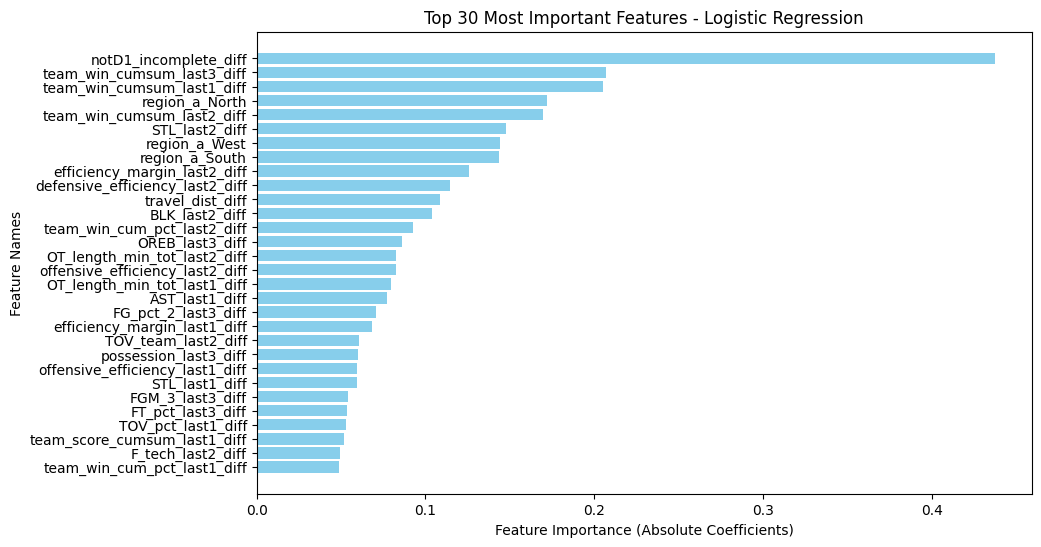

In [168]:
import matplotlib.pyplot as plt

# Sort by importance and keep the top 30
top_30_features = importance_df.nlargest(30, 'Importance')

# Plot the top 30 features
plt.figure(figsize=(10, 6))
plt.barh(top_30_features['Feature'], top_30_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.ylabel('Feature Names')
plt.title('Top 30 Most Important Features - Logistic Regression')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [169]:
from xgboost import XGBClassifier
xgb_steps = [('scaler', StandardScaler()),
         ('classifier', XGBClassifier(
    max_depth=10,  # Reduce tree depth (default is 6)
    learning_rate=0.01,  # Reduce learning rate (default is 0.3)
    n_estimators=500,  # Reduce the number of trees (default is 100)
    subsample=0.9,  # Use a fraction of the training data for each tree
    colsample_bytree=1,  # Use a fraction of features for each tree
    gamma=0.2,  # Minimum loss reduction required to make a further partition
    reg_alpha=0.02,  # L1 regularization term on weights
    reg_lambda=1.0,  # L2 regularization term on weights
    # Other parameters:
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',  # Evaluation metric
    random_state=42  # Random seed for reproducibility
         )
                                       )]
xgb_pipeline1 = Pipeline(xgb_steps)
xgb_pipeline1.fit(df_train[features_diff], df_train['team_a_win'])
xgb_pred = xgb_pipeline1.predict(df_test[features_diff])
xgb_pred_prob = xgb_pipeline1.predict_proba(df_test[features_diff])
roc_auc_score(df_test['team_a_win'], xgb_pred_prob[:, 1])

np.float64(0.7785861711054286)

In [170]:
xgb_pred_prob_train = xgb_pipeline1.predict_proba(df_train[features_diff])
roc_auc_score(df_train['team_a_win'], xgb_pred_prob_train[:, 1])

np.float64(0.9979252479023646)

In [171]:
print(accuracy_score(df_test['team_a_win'], xgb_pred),
precision_score(df_test['team_a_win'], xgb_pred),
recall_score(df_test['team_a_win'], xgb_pred))

0.7327586206896551 0.7586666666666667 0.8530734632683659


In [172]:
df_feat_imp = pd.DataFrame({'feature': features_diff, 'importance': xgb_pipeline1['classifier'].feature_importances_}).sort_values(by='importance', ascending=False)
df_feat_imp.head(30)

,feature,importance
70,team_win_cumsum_last1_diff,0.121485
48,team_win_cumsum_last2_diff,0.057347
43,team_win_cum_pct_last1_diff,0.044709
26,notD1_incomplete_diff,0.031397
49,team_win_cum_pct_last2_diff,0.012986
62,offensive_efficiency_last2_diff,0.011227
52,efficiency_margin_last2_diff,0.011157
9,AST_last1_diff,0.010500
33,offensive_efficiency_last3_diff,0.009856
83,largest_lead_last2_diff,0.009684


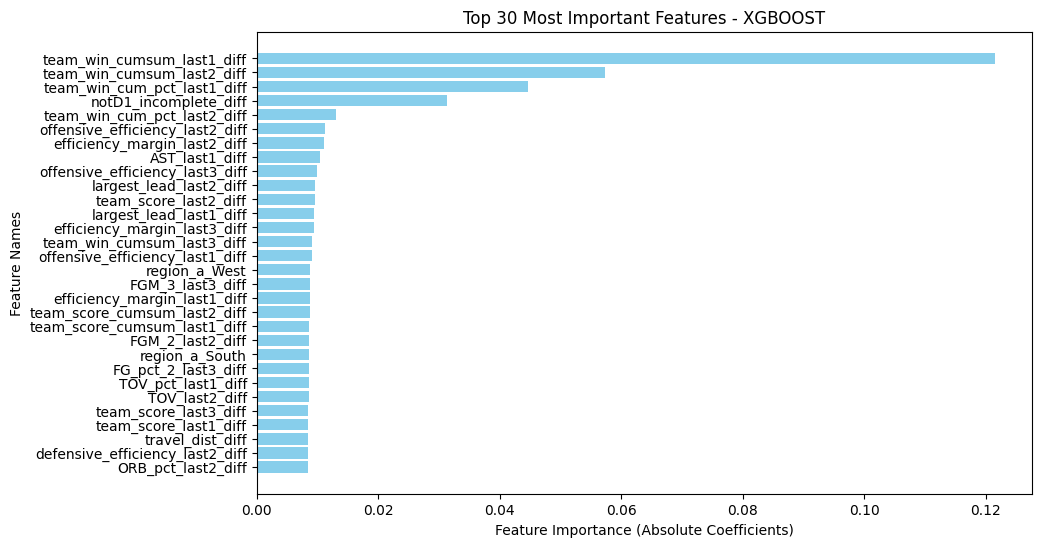

In [173]:
import matplotlib.pyplot as plt

# Sort by importance and keep the top 30
top_30_features = df_feat_imp.nlargest(30, 'importance')

# Plot the top 30 features
plt.figure(figsize=(10, 6))
plt.barh(top_30_features['feature'], top_30_features['importance'], color='skyblue')
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.ylabel('Feature Names')
plt.title('Top 30 Most Important Features - XGBOOST')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [174]:
from sklearn.ensemble import RandomForestClassifier  # Or RandomForestRegressor for regression
rf_steps = [('scaler', StandardScaler()),
         ('classifier', RandomForestClassifier(n_estimators=1000, max_depth = 8, random_state=42))]
rf_pipeline = Pipeline(rf_steps)
rf_pipeline.fit(df_train[features_diff], df_train['team_a_win'])
rf_pred = rf_pipeline.predict(df_test[features_diff])
rf_pred_prob = rf_pipeline.predict_proba(df_test[features_diff])
roc_auc_score(df_test['team_a_win'], rf_pred_prob[:, 1])

np.float64(0.7745099598741743)

In [175]:
rf_pred_prob_train = rf_pipeline.predict_proba(df_train[features_diff])
roc_auc_score(df_train['team_a_win'], rf_pred_prob_train[:, 1])

np.float64(0.9420709987529209)

In [176]:
print(accuracy_score(df_test['team_a_win'], rf_pred),
precision_score(df_test['team_a_win'], rf_pred),
recall_score(df_test['team_a_win'], rf_pred))

0.7279693486590039 0.7536423841059603 0.8530734632683659


In [177]:
from sklearn.ensemble import GradientBoostingClassifier
gb_steps =[('scaler', StandardScaler()),
           ('classifier', GradientBoostingClassifier(n_estimators=500, learning_rate = 0.01,  random_state = 42))]
gb_pipeline = Pipeline(gb_steps)
gb_pipeline.fit(df_train[features_diff], df_train['team_a_win'])
gb_pred = gb_pipeline.predict(df_test[features_diff])
gb_pred_prob = gb_pipeline.predict_proba(df_test[features_diff])
roc_auc_score(df_test['team_a_win'], gb_pred_prob[:, 1])

np.float64(0.7786338926027703)

In [178]:
gb_pred_prob_train = gb_pipeline.predict_proba(df_train[features_diff])
roc_auc_score(df_train['team_a_win'], gb_pred_prob_train[:, 1])

np.float64(0.8578731853789062)

In [179]:
print(accuracy_score(df_test['team_a_win'], gb_pred),
precision_score(df_test['team_a_win'], gb_pred),
recall_score(df_test['team_a_win'], gb_pred))

0.7260536398467433 0.7536617842876165 0.848575712143928


In [ ]:
from sklearn.svm import SVC
svm_steps =[('scaler', StandardScaler()),
           ('classifier', SVC(kernel='linear', C= 5.0, probability=True, random_state = 42))]
svm_pipeline = Pipeline(svm_steps)
svm_pipeline.fit(df_train[features_diff], df_train['team_a_win'])
svm_pred = svm_pipeline.predict(df_test[features_diff])
svm_pred_prob = svm_pipeline.predict_proba(df_test[features_diff])
roc_auc_score(df_test['team_a_win'], svm_pred_prob[:, 1])

In [ ]:
svm_pred_prob_train = svm_pipeline.predict_proba(df_train[features_diff])
roc_auc_score(df_train['team_a_win'], svm_pred_prob_train[:, 1])

In [ ]:
print(accuracy_score(df_test['team_a_win'], svm_pred),
precision_score(df_test['team_a_win'], svm_pred),
recall_score(df_test['team_a_win'], svm_pred))

In [ ]:
# Ensemble predictions using majority voting (for classification)
#ensemble_pred = (lr_pred + lr2_pred + xgb_pred + rf_pred + gb_pred + svm_pred) > 1
ensemble_pred_prob = (lr_pred_prob[:, 1] + lr2_pred_prob[:, 1] + rf_pred_prob[:, 1] + gb_pred_prob[:, 1] + xgb_pred_prob[:, 1] + svm_pred_prob[:, 1] )/6
ensemble_pred = ensemble_pred_prob > 0.5
roc_auc_score(df_test['team_a_win'], ensemble_pred_prob)

In [ ]:
print(accuracy_score(df_test['team_a_win'], ensemble_pred),
precision_score(df_test['team_a_win'], ensemble_pred),
recall_score(df_test['team_a_win'], ensemble_pred))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(df_test['team_a_win'], ensemble_pred )

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### Precdict East Region Teams

In [ ]:
df_east = pd.read_csv('/content/East Regional Games to predict.csv')
df_east

In [ ]:
df_east_home = df_east[['game_id', 'team_home', 'seed_home', 'home_away_NS', 'rest_days_Home', 'travel_dist_Home']]
df_east_home.columns =['game_id', 'team', 'seed', 'home_away_NS', 'rest_days', 'travel_dist']
df_east_home['team_home'] = df_east_home['team']
df_east_away = df_east[['game_id', 'team_away', 'seed_away', 'home_away_NS', 'rest_days_Away', 'travel_dist_Away','team_home']]
df_east_away.columns =['game_id', 'team', 'seed', 'home_away_NS', 'rest_days', 'travel_dist', 'team_home']
df_east_combined = pd.concat([df_east_home, df_east_away])
df_east_combined['team_idx'] = df_east_combined.groupby('game_id')['seed'].rank(method='min', ascending=True)
df_east_combined.sort_values(by=['game_id', 'team_idx'], ascending = True)

In [ ]:
east_team_list = df_east_combined['team'].unique().tolist()

In [ ]:
### pull last match info for East teams
df_east_info = df1[df1['team'].isin(east_team_list)]
df_east_info['game_idx'] = df_east_info.groupby('team')['game_date'].rank(method='min', ascending=False)
df_east_team_info = df_east_info[df_east_info['game_idx']==1]  # last match of East teams

In [ ]:
### Need to rename all last features to one more lag
past_features = [col[:-6] for col in df_east_team_info.columns if col.endswith('_last3')]
df_east_team_info = df_east_team_info.rename(columns={x+'_last3': x+'_last4' for x in past_features})
df_east_team_info = df_east_team_info.rename(columns={x+'_last2': x+'_last3' for x in past_features})
df_east_team_info = df_east_team_info.rename(columns={x+'_last1': x+'_last2' for x in past_features})
df_east_team_info = df_east_team_info.rename(columns={x: x+'_last1' for x in past_features})

In [ ]:
### Remove the columns that New East data already have ('game_id', 'game_date', home_away_NS', 'rest_days', 'travel_dist')
df_east_team_info = df_east_team_info.drop(['game_id', 'game_date', 'home_away_NS', 'rest_days', 'travel_dist'], axis = 1)
### join df_east_team_info with df_east table
df_east_combined = df_east_combined.merge(df_east_team_info, left_on=['team'], right_on=['team'])

In [ ]:
### Remove unuseful features
df_east_combined = df_east_combined.drop([x+'_last4' for x in past_features]+['team_name_rnk', 'game_idx', 'home_away', 'team_win', 'score_diff',
       #'team_game_cnt_cumsum',
         'date_idx'], axis = 1)

In [ ]:
df_east_a = df_east_combined[df_east_combined.team_idx==1].set_index(['game_id', 'team_home']).rename(columns = {col: col + '_a' for col in features+['team', 'team_idx', 'seed', 'team_win_cumcount']})
df_east_b = df_east_combined[df_east_combined.team_idx==2].set_index(['game_id', 'team_home']).rename(columns = {col: col + '_b' for col in features+['team', 'team_idx', 'seed', 'team_win_cum_count']})
df_east_matches = df_east_a.join(df_east_b, how='inner').reset_index()
print(df_east_matches.shape)
df_east_matches.head()

In [ ]:
## fillna with Mean with training data means
df_east_matches[num_cols_all] = df_east_matches[num_cols_all].fillna(num_cols_mean_dict)
df_east_matches['region_a_North'] = 0
df_east_matches['region_a_South'] = 0
df_east_matches['region_a_West'] = 0

In [ ]:
for col in ['notD1_incomplete_a', 'notD1_incomplete_b']:
  df_east_matches[col] = df_east_matches[col].astype(int)

In [ ]:
### Cap to remove abnormal values
df_east_matches.loc[df_east_matches.team_win_cum_pct_last1_b>1, 'team_win_cum_pct_last1_b'] = 1
df_east_matches.loc[df_east_matches.team_win_cum_pct_last1_a>1, 'team_win_cum_pct_last1_a'] = 1

df_east_matches.loc[df_east_matches.team_win_cum_pct_last2_b>1, 'team_win_cum_pct_last2_b'] = 1
df_east_matches.loc[df_east_matches.team_win_cum_pct_last2_a>1, 'team_win_cum_pct_last2_a'] = 1

In [ ]:
df2_east_matches = df_east_matches.copy()
for col in features_raw:
    df2_east_matches[col+'_diff'] = df2_east_matches[col+'_a'] - df2_east_matches[col+'_b']

In [ ]:
### Cap to remove abnormal values
df2_east_matches.loc[df2_east_matches.team_win_cum_pct_last1_diff>1, 'team_win_cum_pct_last1_diff'] = 1
df2_east_matches.loc[df2_east_matches.team_win_cum_pct_last1_diff<-1, 'team_win_cum_pct_last1_diff'] = -1
df2_east_matches.loc[df2_east_matches.team_win_cum_pct_last2_diff>1, 'team_win_cum_pct_last2_diff'] = 1
df2_east_matches.loc[df2_east_matches.team_win_cum_pct_last2_diff<-1, 'team_win_cum_pct_last2_diff'] = -1

In [ ]:
## fillna with Training data mean
df2_east_matches[[col+'_diff' for col in features_raw]] = df2_east_matches[[col+'_diff' for col in features_raw]].fillna(num_cols_mean_dict)

In [ ]:
df2_east_matches

In [ ]:
lr_pred_east = lr_pipeline.predict(df2_east_matches[features_diff])
lr_pred_prob_east = lr_pipeline.predict_proba(df2_east_matches[features_diff])
lr2_pred_east = lr_pipeline2.predict(df2_east_matches[features_diff])
lr2_pred_prob_east = lr_pipeline2.predict_proba(df2_east_matches[features_diff])
xgb_pred_east = xgb_pipeline1.predict(df2_east_matches[features_diff])
xgb_pred_prob_east = xgb_pipeline1.predict_proba(df2_east_matches[features_diff])
rf_pred_east = rf_pipeline.predict(df2_east_matches[features_diff])
rf_pred_prob_east = rf_pipeline.predict_proba(df2_east_matches[features_diff])
gb_pred_east = gb_pipeline.predict(df2_east_matches[features_diff])
gb_pred_prob_east = gb_pipeline.predict_proba(df2_east_matches[features_diff])
svm_pred_east = svm_pipeline.predict(df2_east_matches[features_diff])
svm_pred_prob_east = svm_pipeline.predict_proba(df2_east_matches[features_diff])

In [ ]:
# Ensemble predictions using majority voting (for classification)
ensemble_pred_prob = (lr_pred_prob_east[:, 1] + lr2_pred_prob_east[:, 1] + rf_pred_prob_east[:, 1] + gb_pred_prob_east[:, 1] + xgb_pred_prob_east[:, 1] + svm_pred_prob_east[:, 1] )/6
ensemble_pred_prob.mean()

In [ ]:
predict_prob =  ensemble_pred_prob # ensemble_pred_prob
df2_east_matches['team_a_win_prob'] = predict_prob
df2_east_matches['team_b_win_prob'] = 1 - predict_prob
df2_east_matches.loc[df2_east_matches.team_home == df2_east_matches.team_a, 'home_win_pred_prob'] = df2_east_matches['team_a_win_prob']
df2_east_matches.loc[df2_east_matches.team_home == df2_east_matches.team_b, 'home_win_pred_prob'] = df2_east_matches['team_b_win_prob']

In [ ]:
(df2_east_matches.team_a_win_prob > df2_east_matches.team_b_win_prob) == (df2_east_matches.seed_a < df2_east_matches.seed_b)

In [ ]:
df2_east_matches

In [ ]:
team_stats[team_stats.team.isin(['rhode_island_rams', 'north_carolina_tar_heels'])]

In [ ]:
df2_east_matches['prob_diff'] = df2_east_matches['team_a_win_prob'] - df2_east_matches['team_b_win_prob']
df2_east_matches[['seed_a', 'prob_diff']].corr()